Task-02

* Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.
* Dataset :- https://www.kaggle.com/c/titanic/data



In [ ]:
# IMPORT LIBRARY
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# CSV file and reads the data into a Pandas DataFrame object.
df=pd.read_csv('titanic.csv')

# Exploratory data analysis(EDA) Python

In [ ]:
# Shallow copy
df_copy=df.copy()

In [ ]:
# The shape of a DataFrame.
df.shape

(891, 12)

In [ ]:
# column labels of the Dataframe
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Returns a from the top.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Return the last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# specific rows of a DataFrame ( "integer location" Method)
df.iloc[100:200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [ ]:
# describe() method gives us summary statistics for numerical columns in  DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# prints information about the DataFrame. [number of columns, column labels, column data types, memory usage, range index,]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Including only string columns in a DataFrame description
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Data Cleaning

In [ ]:
# To check for duplicate values in a  DataFrame
df.duplicated().sum()

0

In [ ]:
df.drop(columns='PassengerId',inplace=True)

In [ ]:
# returns the number of missing values.
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Missing value percentage calculator
df.isnull().sum()*100/df.shape[0]

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Values in Each Column')

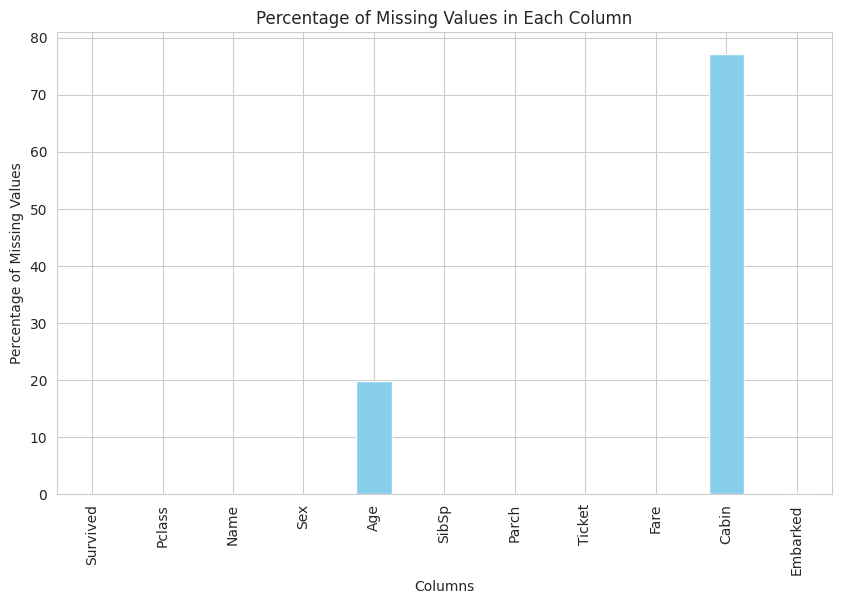

In [ ]:
# missing value percentage calculator plot
sns.set_style("whitegrid")
missing_percentage=df.isnull().sum()*100/df.shape[0]
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')

i'll drop capin because the null values are more than 40%

In [ ]:
# removes columns that contains NULL values
df.drop(columns='Cabin',inplace=True)

In [ ]:
# replaces the NULL values with a specified value
df['Embarked'].fillna(method='ffill',inplace=True)

In [ ]:
# The method of replacing NULL values with mean values.
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-22-f636f44a3637>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

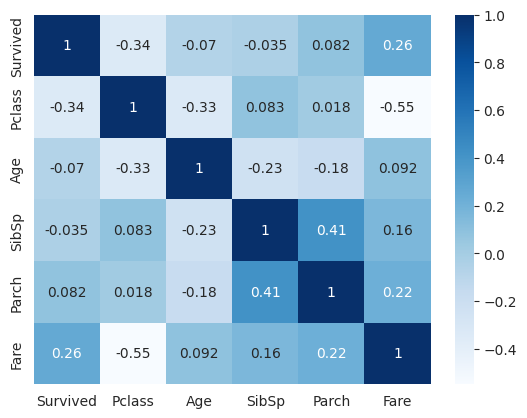

In [ ]:
# used to plot rectangular data in the form of a color-coded matrix.

sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [ ]:
# checks if there are any missing values in the DataFrame
df.isnull().sum().any()

False

In [ ]:
# Numerical columns list
numerical_data=df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Numerical columns list
object_data=df.select_dtypes(include=['object']).columns.tolist()
object_data

['Name', 'Sex', 'Ticket', 'Embarked']

# visualization

Text(0, 0.5, 'Count')

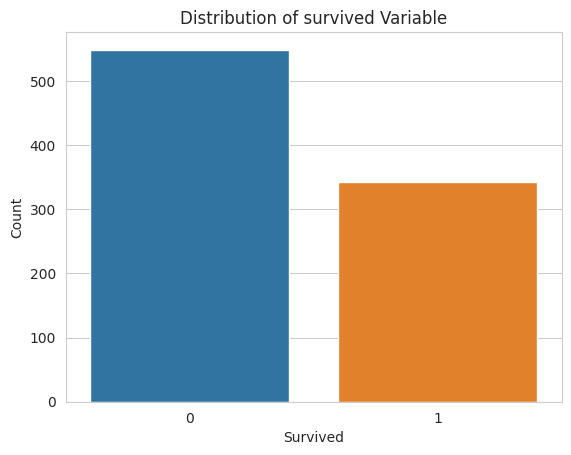

In [ ]:
sns.countplot(x='Survived',data=df)
plt.title('Distribution of survived Variable')
plt.xlabel('Survived')
plt.ylabel('Count')

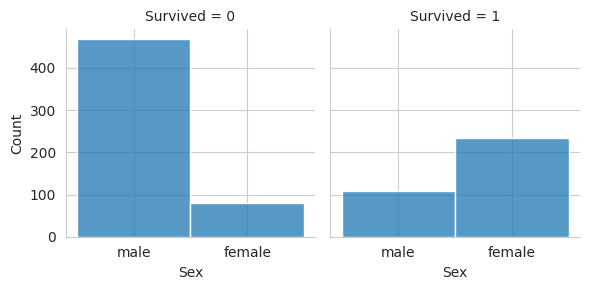

In [ ]:
survied_fg=sns.FacetGrid(df, col="Survived")
survied_fg.map(sns.histplot, "Sex", bins=20)

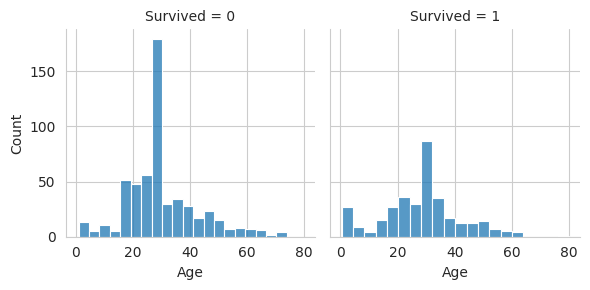

In [ ]:
survied_fg=sns.FacetGrid(df, col="Survived")
survied_fg.map(sns.histplot,'Age',bins=20)
plt.show()

<Axes: xlabel='Parch', ylabel='count'>

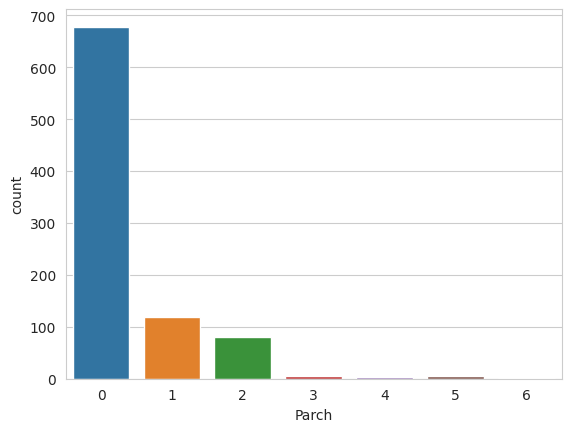

In [ ]:
sns.countplot(x='Parch',data=df)

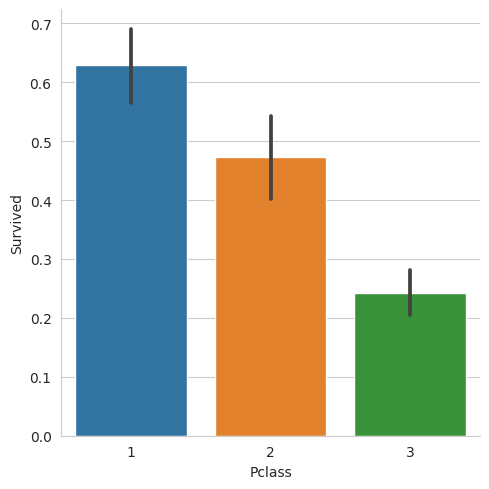

In [ ]:
sns.catplot(x="Pclass", y="Survived", data=df, kind="bar")

<Axes: xlabel='Age', ylabel='Count'>

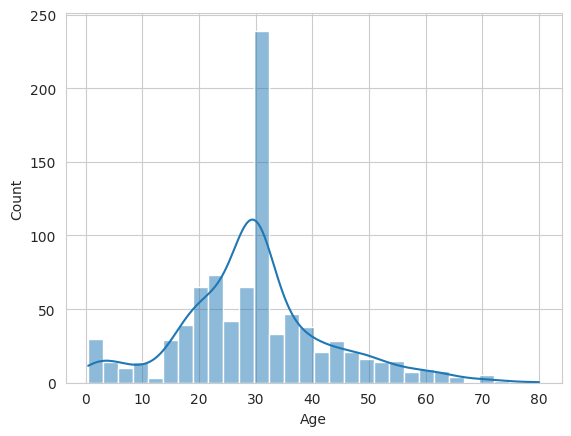

In [ ]:
sns.histplot(df['Age'],kde=True)

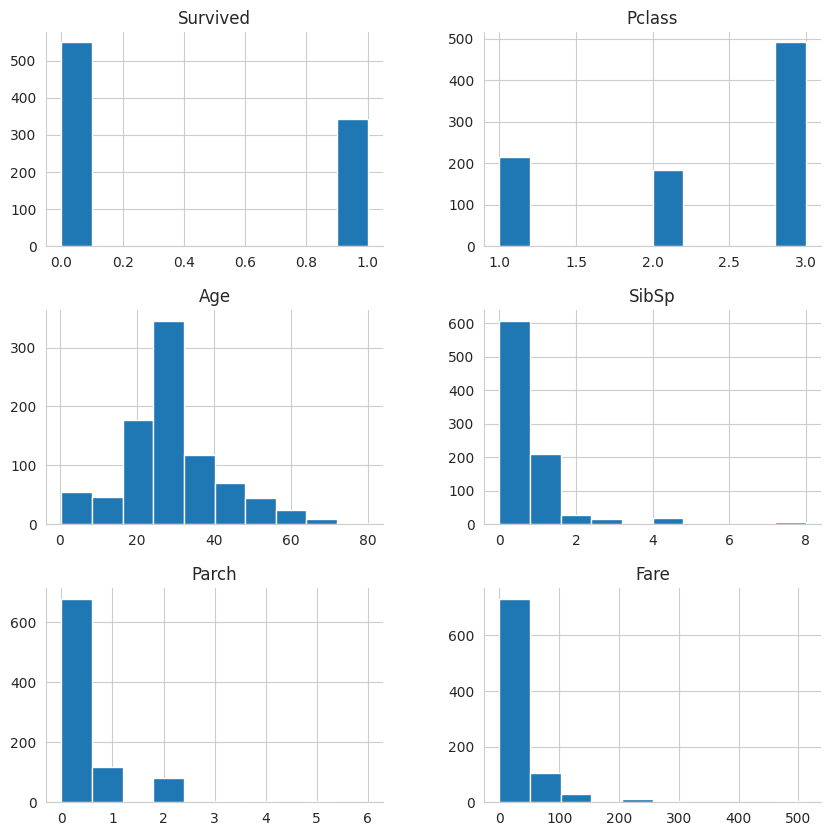

In [ ]:
df[numerical_data].hist(figsize=(10,10))
sns.despine()

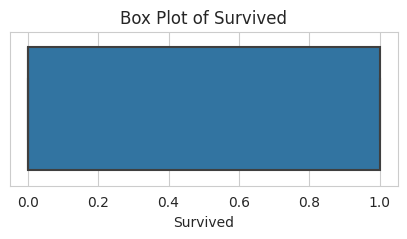

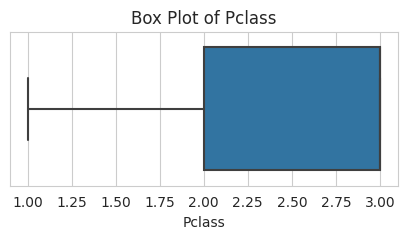

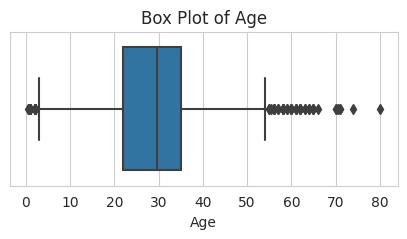

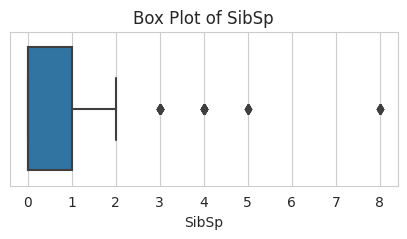

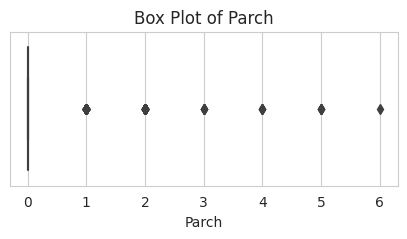

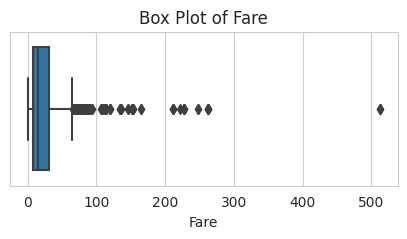

In [ ]:
for column in df[numerical_data]:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

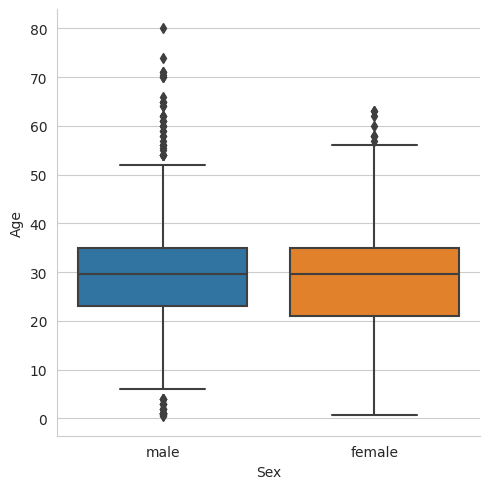

In [ ]:
sns.catplot(data=df,x='Sex',y='Age',kind="box")

<Axes: >

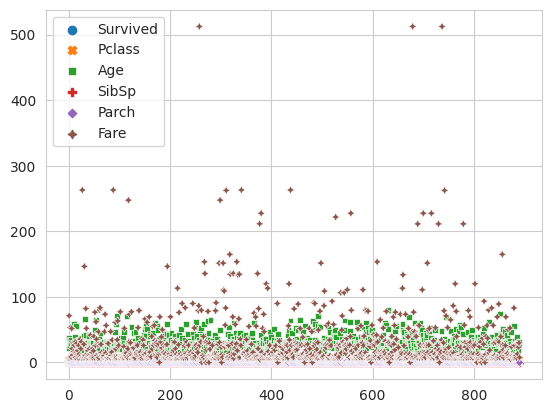

In [ ]:
sns.scatterplot(df)

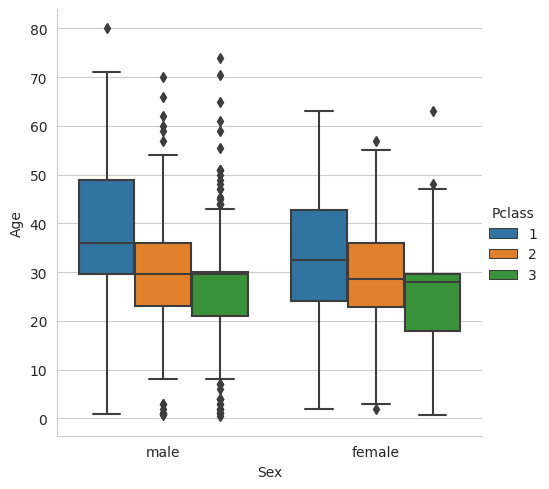

In [ ]:
sns.catplot(x="Sex", y="Age", hue="Pclass", data=df, kind="box")
plt.show()

<Axes: >

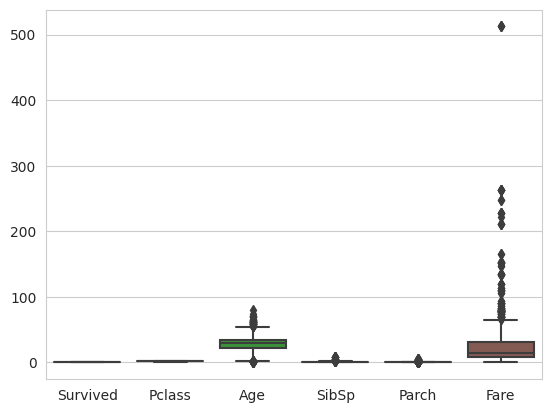

In [ ]:
sns.boxplot(df[numerical_data])

# LabelEncoder

In [ ]:
lb=LabelEncoder()
df['Name']=lb.fit_transform(df['Name'])
df['Ticket']=lb.fit_transform(df['Ticket'])

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'])
df=pd.get_dummies(df,columns=['Sex'])

In [ ]:
df

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,108,22.000000,1,0,523,7.2500,0,0,1,0,1
1,1,1,190,38.000000,1,0,596,71.2833,1,0,0,1,0
2,1,3,353,26.000000,0,0,669,7.9250,0,0,1,1,0
3,1,1,272,35.000000,1,0,49,53.1000,0,0,1,1,0
4,0,3,15,35.000000,0,0,472,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,27.000000,0,0,101,13.0000,0,0,1,0,1
887,1,1,303,19.000000,0,0,14,30.0000,0,0,1,1,0
888,0,3,413,29.699118,1,2,675,23.4500,0,0,1,1,0
889,1,1,81,26.000000,0,0,8,30.0000,1,0,0,0,1


In [ ]:
# x and y spilt

In [ ]:
x=df.drop(columns='Survived',axis=1)
y=df['Survived']

# StandardScaler

In [ ]:
st=StandardScaler()
x=st.fit_transform(x)

# Data Splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Model building function

In [ ]:
def train_evaluation_model(model,X_train,X_test,Y_train,Y_test):
  model.fit(X_train,Y_train)
  pred=model.predict(X_test)
  cm=confusion_matrix(Y_test,pred)
  acc=accuracy_score(Y_test,pred)*100
  cr=classification_report(Y_test,pred)
  print('confusion_matrix:\n',cm)
  print('accuracy_score:',acc)
  print('classification_report:\n',cr)

# K-Nearest Neighbors(knn)

In [ ]:
k=5
knn=KNeighborsClassifier(n_neighbors=k,p=2)

In [ ]:
train_evaluation_model(knn,x_train,x_test,y_train,y_test)

confusion_matrix:
 [[139  18]
 [ 32  79]]
accuracy_score: 81.34328358208955
classification_report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
# K-Nearest Neighbors - Elbow Method Plot

In [ ]:
error=[]
for i in range(1,60):
  knn_i=KNeighborsClassifier(n_neighbors=i)
  knn_i.fit(x_train,y_train)
  y_pred_knn_i=knn_i.predict(x_test)
  error.append(round(np.mean(y_pred_knn_i!=y_test),3))

Text(0, 0.5, 'error_value(miscalssification)')

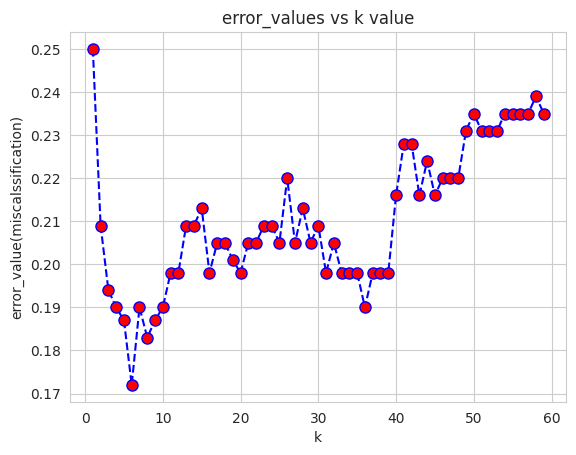

In [ ]:
# PLOT FOR ERROR VALUE
plt.plot(range(1,60),error,color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=8)
plt.title('error_values vs k value')
plt.xlabel('k')
plt.ylabel("error_value(miscalssification)")

# Support Vector Machine(svm)

In [ ]:
svm=SVC(kernel='linear')

In [ ]:
train_evaluation_model(svm,x_train,x_test,y_train,y_test)

confusion_matrix:
 [[134  23]
 [ 33  78]]
accuracy_score: 79.1044776119403
classification_report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



#Logistic Regression

In [ ]:
lg=LogisticRegression()

In [ ]:
train_evaluation_model(lg,x_train,x_test,y_train,y_test)

confusion_matrix:
 [[134  23]
 [ 29  82]]
accuracy_score: 80.59701492537313
classification_report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       157
           1       0.78      0.74      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [55]:
# BY CHANDRASEKAR

In [56]:
# Happy Coding!